# Importing necessary libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split as tts
import pylab as pl
%matplotlib inline

### Reading the CSV File from user for training our model with past inputs and prediction

In [76]:
df = pd.read_csv("DiabetesDataset.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [77]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [78]:
x = df.loc[:,df.columns!='Outcome']
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [79]:
y = df['Outcome']
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

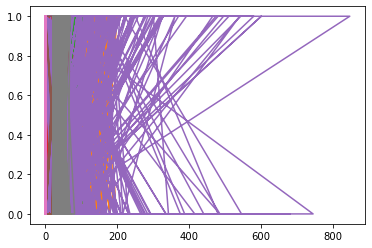

In [80]:
plt.plot(x,y)
plt.show()

# Model -> Support Vector Machine
### Transforming out input to normalize our dataset

In [81]:
x = pp.StandardScaler().fit(x).transform(x)
print(x)

[[ 0.64  0.85  0.15 ...  0.2   0.47  1.43]
 [-0.84 -1.12 -0.16 ... -0.68 -0.37 -0.19]
 [ 1.23  1.94 -0.26 ... -1.1   0.6  -0.11]
 ...
 [ 0.34  0.    0.15 ... -0.74 -0.69 -0.28]
 [-0.84  0.16 -0.47 ... -0.24 -0.37  1.17]
 [-0.84 -0.87  0.05 ... -0.2  -0.47 -0.87]]


### Creating a training and testing set

In [82]:
train_x, test_x, train_y, test_y = tts(x,y,test_size = 0.2, random_state = 5)
print(train_x.shape, train_y.shape,test_x.shape,test_y.shape)

(614, 8) (614,) (154, 8) (154,)


### We can use any of the 4 types of kernel 
#### I have used (kernel = linear) for better accuracy

In [83]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)

SVC(kernel='linear')

In [84]:
y_ = clf.predict(test_x)

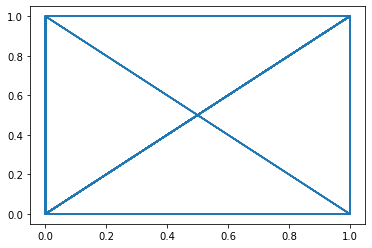

In [85]:
plt.plot(y_,test_y)
plt.show()

### Using confusion matrix for visual representation of accuracy

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [87]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Outcome')
    plt.xlabel('Predicted Outcome')

Confusion matrix, without normalization
[[88 12]
 [19 35]]


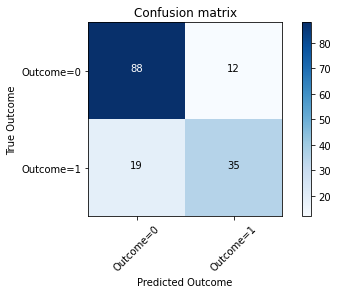

In [88]:
mat = confusion_matrix(test_y,y_,labels = [0,1])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(mat,classes = ['Outcome=0','Outcome=1'],normalize = False,title = 'Confusion matrix')

### Checking the f1_score for accuracy

In [89]:
from sklearn.metrics import f1_score
f1_score(test_y, y_,average = 'weighted')

0.7951292023612299

### Getting the classification report of our Support Vector Machine Model

In [90]:
print(classification_report(test_y,y_))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154



### Making a predictive system by getting input vector from user

In [91]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = np.array(input_data)
input_data = input_data.reshape(1,-1)
predict_out = clf.predict(input_data)
print(predict_out[0])

1


In [92]:
if predict_out[0] == 1:
    print("The person is having Diabetes")
else:
    print("The person is not having Diabetes")

The person is having Diabetes
